**Simple RC circuit**

The simplest RC circuit involves a capacitor, a resistor, and battery in series. The diagram of the circuit is shown below:

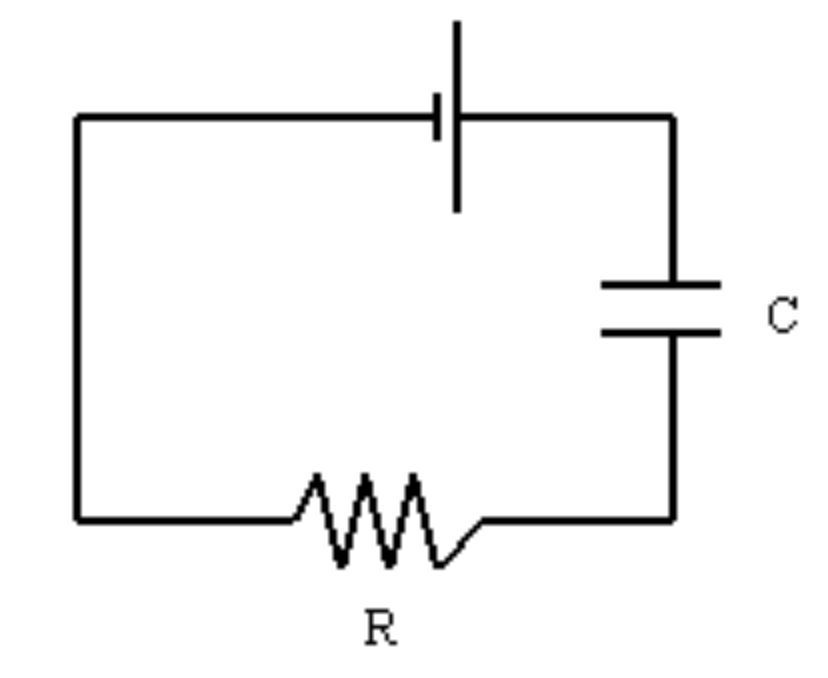


We can use the loop rule, which states that the sum of the potential change $\Delta V$ around a loop is zero. For a capacitor, $\Delta V_C = Q/C$, where $C$ is the capacitance. The loop rule for the potential gives us:

$V_b -Q/C -IR = 0$  

If at time $t=0$ I have an uncharged capacitor $Q(0)=0$, then the equation reduces to $V_b=IR$

In the moment the term $Q/C$ increases, then the current must also decrease such that the sum remains zero. We ultimately want to solve for $Q(t)$. We can rewrite the above equation in terms of $Q$

$V_b - Q/c - \frac{dQ}{dt}R = 0$

This is a simple differential equation. First we rewrite the equation: 

$\frac{V_b}{R}-\frac{Q}{RC}=\frac{dQ}{dt}$ \\



$\rightarrow \frac{V_bC-Q}{RC}=\frac{dQ}{dt}$ 

$\rightarrow \frac{dQ}{V_bC-Q}=\frac{dt}{RC} $

Integrating both sides gets us

$\ln(Q-V_bC)-\ln(-V_bC) = -\frac{t}{RC} \rightarrow \ln (\frac{Q-V_bC}{-V_bC})=-\frac{t}{RC}$

$\frac{Q-V_bC}{-V_bC}=e^{\frac{-t}{RC}}$

$\rightarrow Q = V_bC(1-e^{\frac{-t}{RC}})$

If I know charge on capacitor as function of time, I also know $V_C$ as function of time. \\
$V_C = \frac{Q(t)}{C}$

$\rightarrow V_C = V_b(1- e^{\frac{-t}{RC}})$

I can also find the current

$I =\frac{dQ}{dt} = \frac{V_b}{R}e^{\frac{-t}{RC}}$

We can now perform a numerical calculation. Assume:

$V_b= 3 V$ \\
$R = 10 \Omega$ \\
$C = 0.5 F$ 

$Q(0)=0 C$







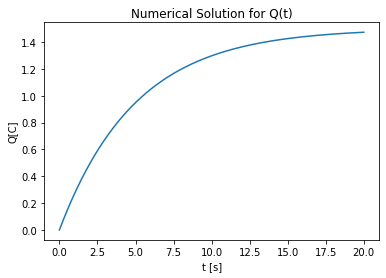

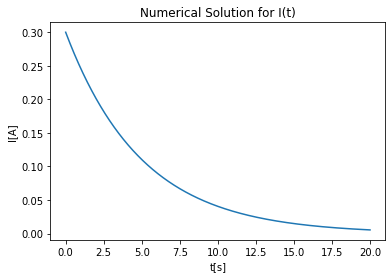

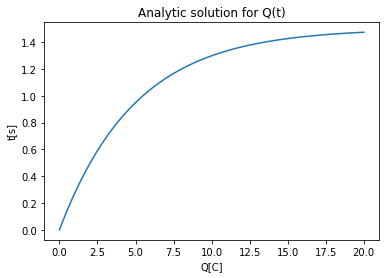

Text(0.5, 1.0, 'Analytic Solution for I(t)')

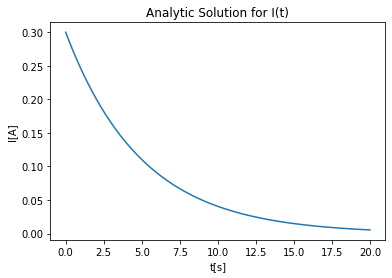

In [14]:
import numpy as np
import matplotlib.pyplot as plt

Vb = 3
R = 10
C = 0.5
Q = 0

t = 0
dt =0.001

ycol_Q = []
ycol_I = []
xcol_t = []

while t<20:
  dQ = dt*Vb/R - Q*dt/(R*C)
  ycol_Q.append(Q)
  xcol_t.append(t)
  I = dQ/dt
  ycol_I.append(I)
  Q += dQ
  t += dt

plt.plot(xcol_t,ycol)
plt.xlabel('t [s]')
plt.ylabel('Q[C]')
plt.title('Numerical Solution for Q(t)')
plt.show()

plt.plot(xcol,ycol_I)
plt.xlabel('t[s]')
plt.ylabel('I[A]')
plt.title('Numerical Solution for I(t)')
plt.show()

# Analytic solutions for Q(t) and I(t)
def Q_ana(x):
  return Vb*C*(1-np.exp(-x/(R*C)))
def I_ana(x):
  return Vb/R*np.exp(-x/(R*C))

Q1 = np.vectorize(Q_ana)
I1 = np.vectorize(I_ana)
x = np.linspace(0,20,100)

plt.plot(x,Q1(x))
plt.xlabel('Q[C]')
plt.ylabel('t[s]')
plt.title('Analytic solution for Q(t)')
plt.show()

plt.plot(x,I1(x))
plt.xlabel('t[s]')
plt.ylabel('I[A]')
plt.title('Analytic Solution for I(t)')